In [1]:
from copy import deepcopy
from numpy import ceil, linspace, meshgrid
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

from qmcpy import *

In [2]:
n = 128

# IID Scatter Plots
Visualize IID standard uniform and standard normal sampling points

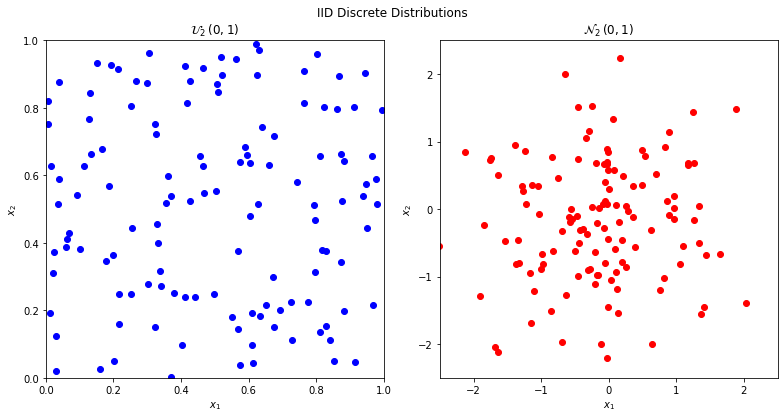

In [3]:
discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7)]
dd_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$"]
colors = ["b", "r"]
lims = [[0, 1], [-2.5, 2.5]]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, lim, dd_name) in enumerate(zip(discrete_distribs, colors, lims, dd_names)):
    samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim(lim)
    ax[i].set_ylim(lim)
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("IID Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/scatters/iid_dd.png", dpi=200)

# Lattice Scatters
Visualize shifted lattice and scrambled Sobol sampling points

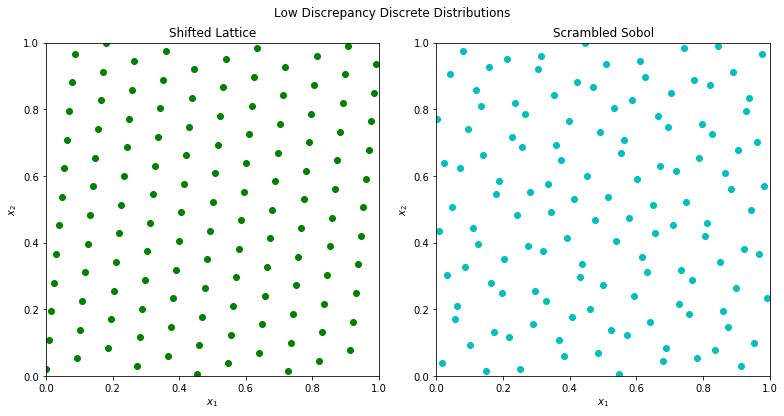

In [4]:
discrete_distribs = [Lattice(rng_seed=7), Sobol(rng_seed=7)]
dd_names = ["Shifted Lattice", "Scrambled Sobol"]
colors = ["g", "c"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, dd_name) in \
        enumerate(zip(discrete_distribs, colors, dd_names)):
    samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim([0, 1])
    ax[i].set_ylim([0, 1])
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("Low Discrepancy Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/scatters/lds_dd.png", dpi=200)

# Transformations
Visualize the different grid transformations

In [5]:
def plot_tm_tranformed(tm_name,true_measure,color,lim):
    discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7),
                         Lattice(rng_seed=7), Sobol(rng_seed=7)]
    dd_names = ["IID $\\mathcal{U}_2\\,(0,1)$", "IID $\\mathcal{N}_2\\,(0,1)$",
                "Shifted Lattice", "Scrambled Sobol"]
    fig, ax = plt.subplots(nrows=1, ncols=len(discrete_distribs), figsize=(13, 4))
    for k, (discrete_distrib, dd_name) in \
            enumerate(zip(discrete_distribs, dd_names)):
        tm_obj = deepcopy(true_measure)
        dd_obj = deepcopy(discrete_distrib)
        tm_obj.set_tm_gen(dd_obj)
        tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
        ax[k].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
        ax[k].set_xlabel("$x_1$")
        ax[k].set_ylabel("$x_2$")
        ax[k].set_xlim(lim)
        ax[k].set_ylim(lim)
        ax[k].set_aspect("equal")
        ax[k].set_title(dd_name)
    fig.suptitle("True Measure: %s" % tm_name)
    plt.tight_layout()
    prefix = type(true_measure).__name__
    fig.savefig("../outputs/scatters/%s_tm_transform.png" % prefix, dpi=200)

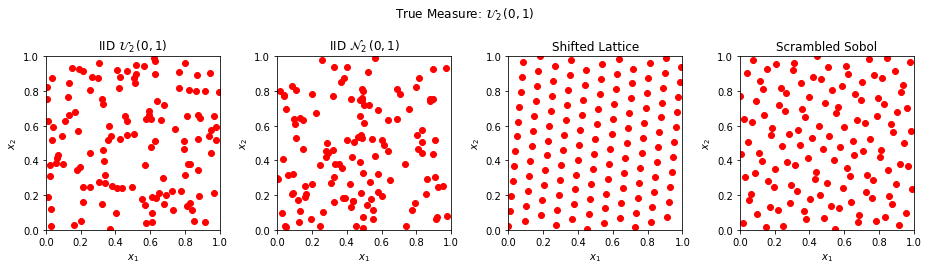

In [6]:
# Transformed to Uniform(0,1)
plot_tm_tranformed("$\\mathcal{U}_2\\,(0,1)$",Uniform(2),"r",[0, 1])

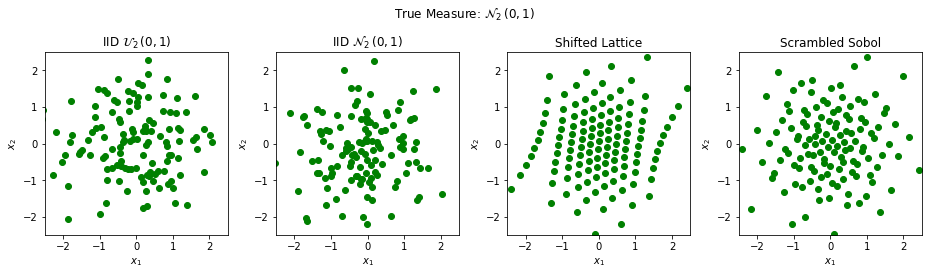

In [7]:
# Transformed to Gaussian(0,1)
plot_tm_tranformed("$\\mathcal{N}_2\\,(0,1)$",Gaussian(2),"g",[-2.5, 2.5])

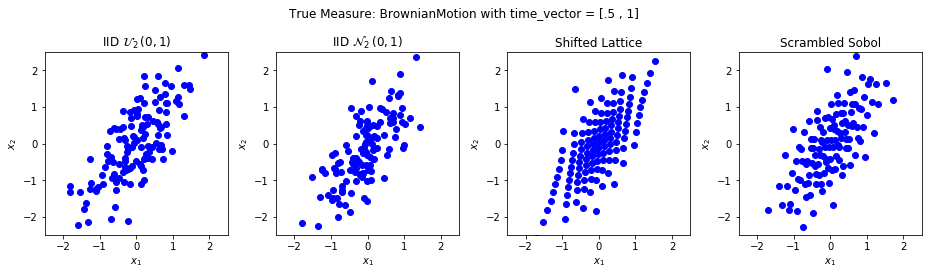

In [8]:
# Transformed to Brownian Motion with monitoring times of 1/2,1
tm_obj = BrownianMotion(dimension=2, time_vector= [arange(1 / 2, 3 / 2, 1 / 2)])
plot_tm_tranformed("BrownianMotion with time_vector = [.5 , 1]",tm_obj,"b",[-2.5, 2.5])

# Sobol Scatters
Visualize shifted and stretched Sobol sampling points

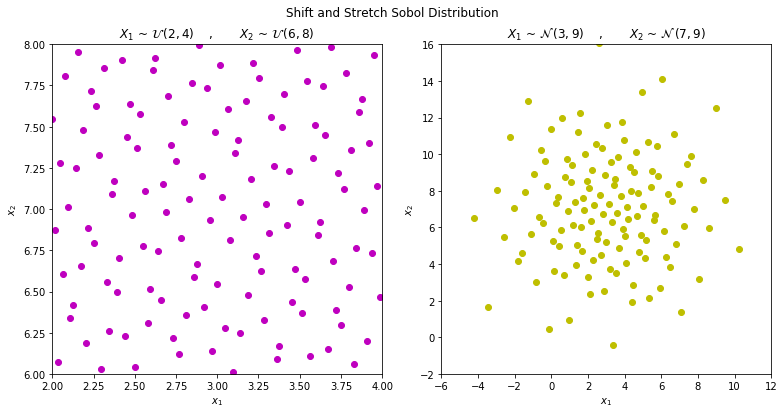

In [9]:
u1_a, u1_b = 2, 4
u2_a, u2_b = 6, 8
g1_mu, g1_var = 3, 9
g2_mu, g2_var = 7, 9
discrete_distrib = Sobol(rng_seed=7)
u_obj = Uniform(dimension=array([2]),
                lower_bound=[array([u1_a, u2_a])],
                upper_bound=[array([u1_b, u2_b])])
n_obj = Gaussian(dimension=array([2]),
                 mean=[array([g1_mu, g2_mu])],
                 variance=[array([g1_var, g2_var])])
colors = ["m", "y"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (true_measure, color) in enumerate(zip([u_obj, n_obj], colors)):
    tm_obj = deepcopy(true_measure)
    dd_obj = deepcopy(discrete_distrib)
    tm_obj.set_tm_gen(dd_obj)
    tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
    ax[i].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_aspect("equal")
ax[0].set_title("$X_1$ ~ $\\mathcal{U}\\,(%d,%d)$\t,\t" % (u1_a, u1_b) +
                "$X_2$ ~ $\\mathcal{U}\\,(%d,%d)$" % (u2_a, u2_b))
ax[1].set_title("$X_1$ ~ $\\mathcal{N}\\,(%d,%d)$\t,\t" % (g1_mu, g1_var) +
                "$X_2$ ~ $\\mathcal{N}\\,(%d,%d)$" % (g2_mu, g2_var))
ax[0].set_xlim([u1_a, u1_b])
ax[0].set_ylim([u2_a, u2_b])
spread_g1 = ceil(3 * g1_var**.5)
spread_g2 = ceil(3 * g2_var**.5)
ax[1].set_xlim([g1_mu - spread_g1, g1_mu + spread_g1])
ax[1].set_ylim([g2_mu - spread_g2, g2_mu + spread_g2])
fig.suptitle("Shift and Stretch Sobol Distribution")
plt.tight_layout()
fig.savefig("../outputs/scatters/shift_stretch_tm.png", dpi=200)

# Plot sampling points for a Keister function.

In [10]:
# Generate constants for 3d plot in following cell
abs_tol = .5
integrand = Keister()
discrete_distrib = IIDStdGaussian(rng_seed=7)
true_measure = Gaussian(dimension=2,variance=1/2)
stopping_criterion = CLT(discrete_distrib,true_measure, abs_tol=abs_tol, n_init=16, n_max=1e10)
sol, data = integrate(integrand, true_measure, discrete_distrib, stopping_criterion)
data.summarize()

Solution: 2.0554         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Keister (Integrand Object)
IIDStdGaussian (Discrete Distribution Object)
Gaussian (True Distribution Object)
CLT (StoppingCriterion Object)
                  abs_tol: 0.5000         
                  rel_tol: 0.0000         
                    n_max: 10000000000
                  inflate: 1.2000         
                    alpha: 0.0100        
MeanVarData (Data Object)
                        n: [65.]          
                  n_total: [0.]           
               time_total: 0.0018         
               confid_int: [1.6462888  2.46441755]



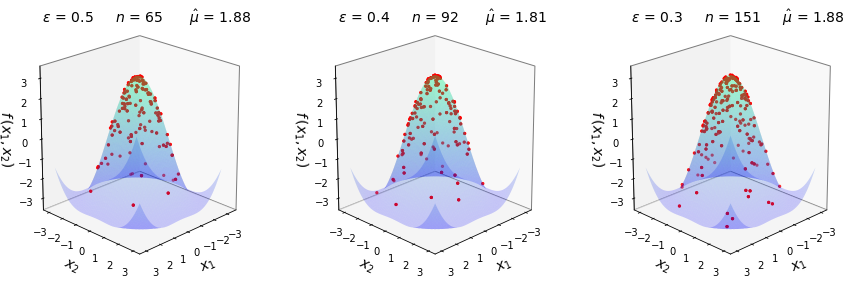

In [11]:
# Constants based on running the above CLT Example
eps_list = [.5, .4, .3]
n_list = [65, 92, 151]
mu_hat_list = [1.876, 1.806, 1.883]

# qmcpy objects
integrand = Keister()
true_measure = Gaussian(2)
discrete_distrib = IIDStdGaussian(rng_seed=7)
true_measure.transform(integrand, discrete_distrib)

# Function Points
nx, ny = (100, 100)
points_fun = zeros((nx * ny, 3))
x = linspace(-3, 3, nx)
y = linspace(-3, 3, ny)
x_2d, y_2d = meshgrid(x, y)
points_fun[:, 0] = x_2d.flatten()
points_fun[:, 1] = y_2d.flatten()
points_fun[:, 2] = integrand.f(points_fun[:, :2])
x_surf = points_fun[:, 0].reshape((nx, ny))
y_surf = points_fun[:, 1].reshape((nx, ny))
z_surf = points_fun[:, 2].reshape((nx, ny))

# 3D Plot
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

for idx, ax in enumerate([ax1, ax2, ax3]):
    # Surface
    ax.plot_surface(x_surf, y_surf, z_surf, cmap="winter", alpha=.2)
    # Scatters
    points = zeros((n, 3))
    points[:, :2] = true_measure[0].gen_tm_samples(1, n).squeeze()
    points[:, 2] = integrand[0].f(points[:, :2])
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    n = n_list[idx]
    epsilon = eps_list[idx]
    mu = mu_hat_list[idx]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.set_title("\t$\\epsilon$ = %-7.1f $n$ = %-7d $\\hat{\\mu}$ = %-7.2f "
                 % (epsilon, n, mu), fontdict={"fontsize": 14})
    # axis metas
    n *= 2
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor("black")
    ax.yaxis.pane.set_edgecolor("black")
    ax.set_xlabel("$x_1$", fontdict={"fontsize": 14})
    ax.set_ylabel("$x_2$", fontdict={"fontsize": 14})
    ax.set_zlabel("$f\\:(x_1,x_2)$", fontdict={"fontsize": 14})
    ax.view_init(20, 45)
plt.savefig("../outputs/Three_3d_SurfaceScatters.png", dpi=500, bbox_inches="tight", pad_inches=.15)